In [47]:
from torch.autograd import Variable
import torch
import torch.autograd
import torch.nn.functional as F
import random
import numpy as np
from params_poly import p
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim


Loss: 0.000273 after 249 batches
==> Learned function:	y = +3.29 x^4 +1.35 x^3 +0.33 x^2 +3.10 x^1 -2.27
==> Actual function:	y = +3.88 x^4 +0.13 x^3 -3.47 x^2 +1.14 x^1 -4.66


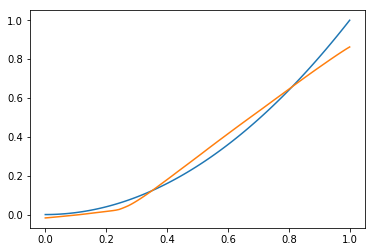

In [52]:
POLY_DEGREE = 4
W_target = Variable(torch.randn(POLY_DEGREE, 1) * 5)
b_target = Variable(torch.randn(1) * 5)


def poly(x):
    return x * x

def make_data():
    X = np.linspace(0, 1, 100)
    Y = np.apply_along_axis(poly, 0, X)
    return X, Y


def seed(p):
    # set random seed        
    np.random.seed(p.seed) 
    torch.manual_seed(p.seed)    
    random.seed(p.seed)
    
    
## network
class PolyNet(nn.Module):
    def __init__(self):
        super(PolyNet, self).__init__()
        self.fc1 = nn.Linear(1, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 1)
        
    def forward(self, x):
        x = x.view(-1, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
seed(p)
X, Y = make_data()
plt.plot(X, Y)

X_t, Y_t = Variable(torch.Tensor(X)), Variable(torch.Tensor(Y))
model = PolyNet()
optimizer = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.1)

def train():

#     fc = torch.nn.Linear(W_target.size(0), 1)

    for batch_idx in range(1000):
        # Reset gradients
#         model.zero_grad()
        optimizer.zero_grad()

        # Forward pass
        output = F.smooth_l1_loss(model(X_t), Y_t)
        loss = output.data[0]

        # Backward pass
        output.backward()

        # Apply gradients
        optimizer.step()

        # Stop criterion
        if loss < 1e-3:
            break
            
train()

yhat = model(X_t).data.numpy()
plt.plot(X, yhat)
print('Loss: {:.6f} after {} batches'.format(loss, batch_idx))
print('==> Learned function:\t' + poly_desc(fc.weight.data.view(-1), fc.bias.data))
print('==> Actual function:\t' + poly_desc(W_target.data.view(-1), b_target.data))